# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [96]:
# Load pickled data
import pickle

training_file = 'train.p'
validation_file = 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("Done")

Done


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [97]:
n_train = len(X_train)
n_test = len(X_test)

n_valid = len(X_valid)
image_shape = X_train[0].shape

# Or X
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Done")

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43
Done


In [ ]:
# Visualization of the Dataset

About to display some example images for labels (0, 7)


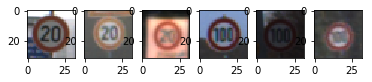

About to display some example images for labels (14, 17)


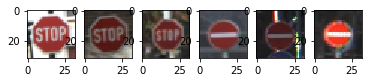

About to display some example images for labels (18, 20)


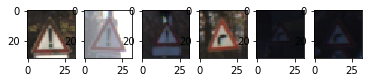

About to display some example images for labels (21, 25)


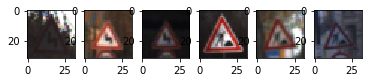

About to display some example images for labels (28, 35)


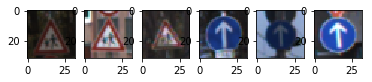

In [98]:
%matplotlib inline
vis_images = []

for display_label_pair in ((0, 7), (14, 17), (18, 20), (21, 25), (28, 35)):
    print("About to display some example images for labels {}".format(display_label_pair))
    label_examples_1 = (img for img, label in zip(X_train, y_train) if label == display_label_pair[0])
    label_examples_2 = (img for img, label in zip(X_train, y_train) if label == display_label_pair[1])

    for ind in range(3):
        for ind2 in range(50):
            next(label_examples_1)
        img = next(label_examples_1)
        plt.subplot(1, 6, ind + 1)
        plt.imshow(img)
        vis_images.append(img)
    for ind3 in range(3):
        for ind2 in range(50):
            next(label_examples_2)
        img = next(label_examples_2)
        plt.subplot(1, 6, ind3 + 4)
        plt.imshow(img)
        vis_images.append(img)
                           
    plt.show()


Number or examples: 86413
Original label stats: {0: 180, 1: 1980, 2: 2010, 3: 1260, 4: 1770, 5: 1650, 6: 360, 7: 1290, 8: 1260, 9: 1320, 10: 1800, 11: 1170, 12: 1890, 13: 1920, 14: 690, 15: 540, 16: 360, 17: 990, 18: 1080, 19: 180, 20: 300, 21: 270, 22: 330, 23: 450, 24: 240, 25: 1350, 26: 540, 27: 210, 28: 480, 29: 240, 30: 390, 31: 690, 32: 210, 33: 599, 34: 360, 35: 1080, 36: 330, 37: 180, 38: 1860, 39: 270, 40: 300, 41: 210, 42: 210}
Maximum number of examples in a class: 2010
Label stats after preprocessing: {0: 2009, 1: 2009, 2: 2010, 3: 2010, 4: 2010, 5: 2010, 6: 2009, 7: 2010, 8: 2010, 9: 2010, 10: 2010, 11: 2009, 12: 2010, 13: 2010, 14: 2010, 15: 2010, 16: 2009, 17: 2009, 18: 2010, 19: 2009, 20: 2010, 21: 2010, 22: 2009, 23: 2010, 24: 2010, 25: 2010, 26: 2010, 27: 2009, 28: 2010, 29: 2010, 30: 2010, 31: 2010, 32: 2009, 33: 2009, 34: 2009, 35: 2010, 36: 2009, 37: 2009, 38: 2009, 39: 2010, 40: 2010, 41: 2009, 42: 2009}


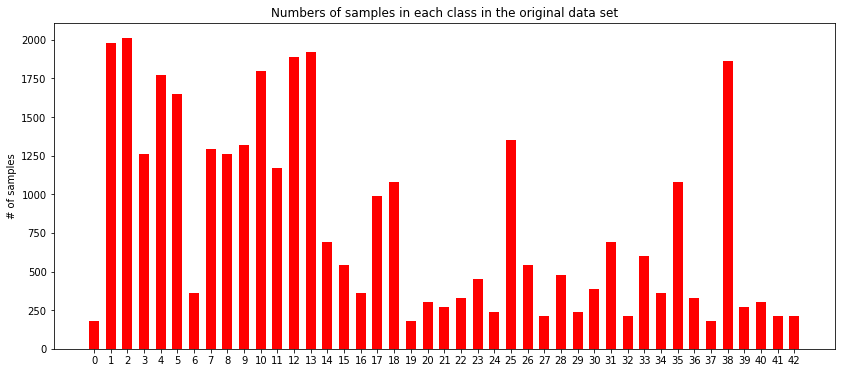

In [106]:
orig_label_stats_train = {ind: list(y_train).count(ind) for ind in set(y_train)}
orig_label_stats_valid = {ind: list(y_train).count(ind) for ind in set(y_valid)}

def print_test_data_basic_summary(features, labels, orig_label_stats, preprocessed_label_stats):
    assert len(features) == len(labels)
    print("Number or examples: {}".format(len(features)))
    print("Original label stats: {}".format(orig_label_stats))
    print("Maximum number of examples in a class: {}".format(max(orig_label_stats.values())))
    print("Label stats after preprocessing: {}".format(preprocessed_label_stats))

print_test_data_basic_summary(features_train, labels_train, orig_label_stats_train, processed_label_stats_train)

def chart_label_stats(label_stats, set_label="original"):
    xs =  np.arange(len(label_stats))
    width = 0.6
    fig, ax = plt.subplots(figsize=(14, 6))
    rects1 = ax.bar(xs, label_stats.values(), width, color='r')
    ax.set_ylabel('# of samples')
    ax.set_title('Numbers of samples in each class in the {} data set'.format(set_label))
    ax.set_xticks(xs)
    ax.set_xticklabels(label_stats.keys())

    
chart_label_stats(orig_label_stats_train)

# Preprocessing and Fixing Relative Counts

As the bar chart above indicates, some classes have more training examples than others. We should do something about this. 

Let us generate more data to classes that have fewer examples. 

While doing this, it makes sense to also add some randomness to the generated examples. Hence, move on to the whole preprocessing step. 

In [107]:
import numpy as np
from random import random

def normalize_luminosity(img):
    """Normalize contrast as per http://stackoverflow.com/a/38312281 """
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

    # equalize the histogram of the Y channel
    channel = img_yuv[:, :, 0]
    # plt.imshow(channel)
    # plt.show()
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    color_img = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    return color_img



def preprocess_train_test_data(train_features, train_labels, valid_features, valid_labels):
    """Todo: Initial steps towards some grayscaling etc. Remember, at this point the images have already been shuffled."""

    # TODO: find out ways to preprocess the data in meaningful ways.

    # halfway_train = len(X_train) // 2
    # train_1st_half_copy = X_train[:halfway_train]
    # train_2st_half_copy = X_train[halfway_train:]

    # labels_train_1st_half = y_train[:halfway_train]
    # labels_train_2st_half = y_train[halfway_train:]

    # Find the number of occurrences of each of the labels in the training data:

    orig_label_stats_train = {ind: list(train_labels).count(ind) for ind in set(train_labels)}
    orig_label_stats_valid = {ind: list(valid_labels).count(ind) for ind in set(valid_labels)}
    max_num_labels = max(orig_label_stats_train.values())

    for label, num in orig_label_stats_train.items():
        # Find all images with this label
        imgs = [img_label[0] for img_label in zip(train_features, train_labels) if img_label[1] == label]

        coeff = max_num_labels / orig_label_stats_train[label] - 1
        coeff_int = int(np.floor(coeff))
        original_length = len(imgs)
        if coeff_int > 0:
            imgs_repeated = np.array([img for img in imgs for _ in range(coeff_int)])
        else:
            imgs_repeated = np.array([])
        max_ind = int((coeff - coeff_int) * original_length)
        if max_ind > 0:
            if len(imgs_repeated) > 0:
                imgs_repeated = np.concatenate((imgs_repeated, imgs[:max_ind]))
            else:
                imgs_repeated = np.array(imgs[:max_ind])

        rotation_angles = [24 * (random() - 0.5) for _ in range(len(imgs_repeated))]
        scale_coeffs = [1 + 0.5 * (random() - 0.5) for _ in range(len(imgs_repeated))]

        for ind, img in enumerate(imgs_repeated):
            matr = cv2.getRotationMatrix2D((16, 16), rotation_angles[ind], scale_coeffs[ind])
            imgs_repeated[ind] = cv2.warpAffine(img, matr, (32, 32))

        if len(imgs_repeated) > 0:
            train_features = np.concatenate((train_features, imgs_repeated))
            train_labels = np.concatenate([train_labels, np.tile(label, len(imgs_repeated))])

    # Add a slightly scaled version of the other half of the images, with a little bit of added noise.

    normalized_train = [normalize_luminosity(img) for img in train_features]
    normalized_valid = [normalize_luminosity(img) for img in valid_features]

    preprocessed_label_stats_train = {ind: list(train_labels).count(ind) for ind in set(train_labels)}
    preprocessed_label_stats_valid = {ind: list(valid_labels).count(ind) for ind in set(valid_labels)}
    return normalized_train, train_labels, normalized_valid, valid_labels, orig_label_stats_train, \
           preprocessed_label_stats_train, orig_label_stats_valid, preprocessed_label_stats_valid

features_train, labels_train, features_test, labels_test, orig_label_stats_train, processed_label_stats_train, \
    orig_label_stats_test, processed_label_stats_test = preprocess_train_test_data(X_train, y_train, X_test, y_test)


print("Done")



Done


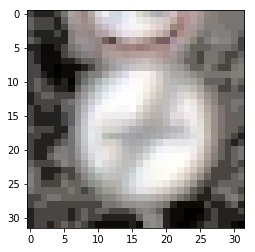

In [108]:
plt.imshow(normalize_luminosity(features_train[0]))

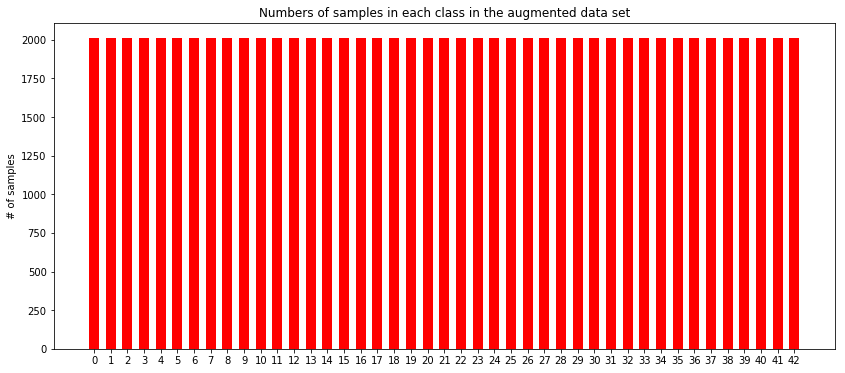

In [109]:
# FIXME: this is now showing stats for the already preprocessed features, change this



chart_label_stats(processed_label_stats_train, set_label="augmented")


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [110]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

features_train, labels_train = shuffle(features_train, labels_train)

### Model Architecture

In [122]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten
import re

SIGMA = 0.05
MU = 0.0
LEARNING_RATE = 0.0014
EPOCHS = 20
BATCH_SIZE = 128

FIRST_CONVO_WEIGHTS_NAME = 'first_convo_weights'
FIRST_CONVO_WEIGHTS_PATTERN = re.compile(FIRST_CONVO_WEIGHTS_NAME + '.*')
SECOND_CONVO_WEIGHTS_NAME = 'second_convo_weights'
SECOND_CONVO_WEIGHTS_PATTERN = re.compile(SECOND_CONVO_WEIGHTS_NAME + '.*')

def LeNet(x, network):
    mu = MU
    sigma = SIGMA

    F_W_1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), 
                                            mean=mu, stddev=sigma), 
                        name=FIRST_CONVO_WEIGHTS_NAME)
    F_b_1 = tf.Variable(tf.zeros(6), name='first_convo_biases')
    strides_conv = [1, 1, 1, 1]
    padding = 'VALID'
    conv1 = tf.nn.conv2d(x, F_W_1, strides=strides_conv, padding=padding) + F_b_1

    conv1 = tf.nn.relu(conv1)
    
    network['convo_1'] = conv1
    
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    
    pool1 = tf.nn.max_pool(conv1, ksize, strides, padding)
    network['pool_1'] = pool1
    
    F_W_2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), 
                                            mean=mu, stddev=sigma), 
                        name=SECOND_CONVO_WEIGHTS_NAME)
    F_b_2 = tf.Variable(tf.zeros([16]), name='second_convo_biases')
    conv2 = tf.nn.conv2d(pool1, F_W_2, strides_conv, padding) + F_b_2

    conv2 = tf.nn.relu(conv2)
    network['convo_2'] = conv2

    pool2 = tf.nn.max_pool(conv2, ksize, strides, padding)
    network['pool_2'] = pool2
    pool = tf.nn.dropout(pool, 0.8)
    
    flat = flatten(pool2)

    F_W_full_1 = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma), name='first_full_weights')
    F_b_full_1 = tf.Variable(tf.zeros([120]), name='first_full_biases')
    full1 = tf.matmul(flat, F_W_full_1) + F_b_full_1
    full1 = tf.nn.relu(full1)

    F_W_full_2 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma), name='second_full_weights')
    F_b_full_2 = tf.Variable(tf.zeros([84]), name='second_full_biases')
    full2 = tf.matmul(full1, F_W_full_2) + F_b_full_2
    full2 = tf.nn.relu(full2)

    F_W_full_3 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev=sigma), name='third_full_weights')
    F_b_full_3 = tf.Variable(tf.zeros([43]), name='third_full_biases')
    full3 = tf.matmul(full2, F_W_full_3) + F_b_full_3

    return full3, network

print("Done")

Done


In [123]:


# Once again, a method is used because this is copied over from a plain python implementation
def define_model_architecture():
    """Define all the necessary tensorflow stuff here. Variables, losses, layer structure etc. ...
    :return: Nothing, just sets various network topology related tensors."""

    x = tf.placeholder(tf.float32, (None, 32, 32, 3))
    y = tf.placeholder(tf.int32, None)
    
    network_topology = dict(x=x, y=y)

    one_hot_y = tf.one_hot(y, 43)

    logits, network_topology = LeNet(x, network_topology)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)

    network_topology['logits'] = logits
    network_topology['softmaxes'] = tf.nn.softmax(logits)
    network_topology['epochs'] = EPOCHS
    network_topology['batch_size'] = BATCH_SIZE

    loss_operation = tf.reduce_mean(cross_entropy)
    # step = tf.Variable(0, trainable=False)
    # learning_rate = tf.train.exponential_decay(LEARNING_RATE * 2, step, 100, 0.995)
    optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE)

    network_topology['loss_operation'] = loss_operation
    # network_topology['training_operation'] = optimizer.minimize(loss_operation, global_step=step)
    network_topology['training_operation'] = optimizer.minimize(loss_operation)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    network_topology['accuracy_operation'] = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    return network_topology

network = define_model_architecture()
print("Done")

Done


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [124]:
def evaluate(X_data, y_data, batch_size, accuracy_operation, x, y):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset + batch_size], y_data[offset:offset + batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob=1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [125]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

from datetime import datetime

def train_network_and_save_params(network, train_features, train_labels, valid_features, valid_labels, own_features, own_labels):
    """Train the network and print statistics. Also saves the model.
    
    The train_features and valid_features should be preprocessed by now, from here on they are used as is."""

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(train_features)

        # Assigning to local variables for easier lookup
        batch_size = network['batch_size']
        epochs = network['epochs']
        training_operation = network['training_operation']
        accuracy_operation = network['accuracy_operation']
        x = network['x']
        y = network['y']

        print("Training...")
        print()
        for i in range(epochs):
            train_features, train_labels = shuffle(train_features, train_labels)
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = train_features[offset:end], train_labels[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob=0.7})

            validation_accuracy = evaluate(valid_features, valid_labels, batch_size, accuracy_operation, x, y)
            print("{}: EPOCH {} ...".format(datetime.now(), i + 1))
            print("Validation Accuracy = {:.6f}".format(validation_accuracy))

            # validation_accuracy_own_data = evaluate(own_features, own_labels, batch_size, accuracy_operation, x, y)
            # print("Validation Accuracy using own data = {:.6f}".format(validation_accuracy_own_data))

        name = tf.train.Saver().save(sess, './lenet-2.ckpt')
        print("Model saved, model name: {}".format(name))

train_network_and_save_params(network, features_train, labels_train, features_test, labels_test, None, None)    

Training...

2017-06-15 18:59:55.962000: EPOCH 1 ...
Validation Accuracy = 0.804671
2017-06-15 19:00:39.386346: EPOCH 2 ...
Validation Accuracy = 0.825812
2017-06-15 19:01:23.477911: EPOCH 3 ...
Validation Accuracy = 0.818923
2017-06-15 19:02:07.975852: EPOCH 4 ...
Validation Accuracy = 0.864133
2017-06-15 19:02:56.640974: EPOCH 5 ...
Validation Accuracy = 0.844893
2017-06-15 19:03:43.363962: EPOCH 6 ...
Validation Accuracy = 0.874109
2017-06-15 19:04:30.515503: EPOCH 7 ...
Validation Accuracy = 0.873001
2017-06-15 19:05:15.777755: EPOCH 8 ...
Validation Accuracy = 0.873555
2017-06-15 19:06:00.569378: EPOCH 9 ...
Validation Accuracy = 0.885036
2017-06-15 19:06:47.032770: EPOCH 10 ...
Validation Accuracy = 0.869834
2017-06-15 19:07:36.180075: EPOCH 11 ...
Validation Accuracy = 0.869834
2017-06-15 19:08:23.425145: EPOCH 12 ...
Validation Accuracy = 0.861599
2017-06-15 19:09:10.857139: EPOCH 13 ...
Validation Accuracy = 0.881552
2017-06-15 19:09:57.485647: EPOCH 14 ...
Validation Accuracy

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

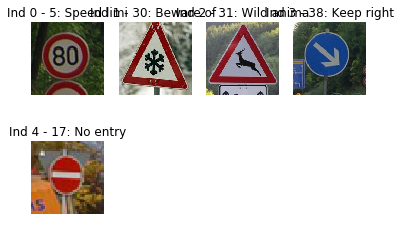

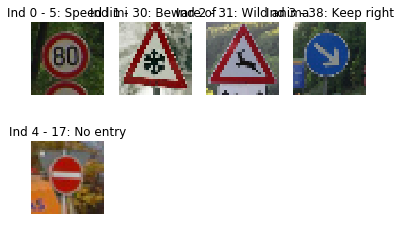

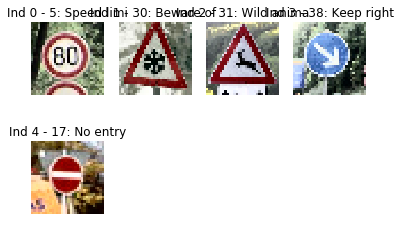

In [21]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.


import os
import csv

WEB_FILENAMES = ['5-speed-limit-80-km-h-cropped-3.png', '30-snow-cropped-3.png',
                 '31-wild-animals-passing-cropped-3.png', '38-keep-right-cropped-3.png',
                 '17-no-entry-cropped-3.png']

def load_web_images():
    # Loads the images in BRG mode.
    images = np.array([cv2.imread(os.path.join('web-images', x)) for x in WEB_FILENAMES])
    images = np.array(
        [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]
    )
    labels = [x.split("-")[0] for x in WEB_FILENAMES]
    return images, labels


def visualize_data(features, labels, split=False):
    """Draw some predefined plots of the data. The function is rather quick and hacky and does 
    not generalize well for feature sets of different sizes but does the job for this particular
    purpose."""
    label_dict = {}
    with open('signnames.csv', 'r') as csvfile:
        datareader = csv.DictReader(csvfile)
        for row in datareader:
            label_dict[row['ClassId']] = row['SignName']

    halfway = len(features) // 2

    if split:
        for i in range(1, 9):
            plt.subplot(4, 4 , i)
            plt.imshow(features[i - 1])
            plt.axis('off')
            plt.title("Ind {} - {}: {}".format(i - 1, labels[i - 1], label_dict[str(labels[i - 1])][:10]))
        for i in range(1, 9):
            plt.subplot(4,4,i + 8)
            plt.imshow(features[halfway + i - 1])
            plt.axis('off')
            plt.title("Ind {} - {}: {}".format(halfway + i - 1, labels[halfway + i - 1], label_dict[str(labels[halfway + i - 1])][:10]))
        plt.show()
    elif len(features) > 5:
        # Plot the 12 first images
        for i in range(1, 9):
            plt.subplot(4, 3, i)
            if len(features) > i + 1:
                plt.imshow(features[i - 1])
                plt.axis('off')
                plt.title("Ind {} - {}: {}".format(i - 1, labels[i - 1], label_dict[str(labels[i - 1])][:10]))
        plt.show()
    elif len(features) == 5:
        for i in range(1, 6):
            plt.subplot(2, 4, i)
            plt.imshow(features[i - 1])
            plt.axis('off')
            plt.title("Ind {} - {}: {}".format(i - 1, labels[i - 1], label_dict[str(labels[i - 1])][:10]))
        plt.show()
    else:
        raise Exception("Wrong image number specification!")


def preprocess_web_data(features, labels):
    normalized_features = np.array([])

    # halfway_train = len(X_train) // 2
    # train_1st_half_copy = X_train[:halfway_train]
    # train_2st_half_copy = X_train[halfway_train:]

    # labels_train_1st_half = y_train[:halfway_train]
    # labels_train_2st_half = y_train[halfway_train:]

    # Find the number of occurrences of each of the labels in the training data:

    orig_label_stats = {ind: list(labels).count(ind) for ind in set(labels)}
    max_num_labels = max(orig_label_stats.values())

    for label, num in orig_label_stats.items():
        # Find all images with this label
        imgs = np.array([img_label[0] for img_label in zip(features, labels) if img_label[1] == label])
        coeff = max_num_labels / orig_label_stats[label] - 1
        coeff_int = int(np.floor(coeff))
        original_length = len(imgs)
        if coeff_int > 1:
            imgs_repeated = [img for img in imgs for _ in range(coeff_int)]
        else:
            imgs_repeated = np.array([])
        max_ind = int((coeff - coeff_int) * original_length)
        if max_ind > 0:
            if len(imgs_repeated) > 0:
                imgs_repeated = np.concatenate((imgs_repeated, imgs[:max_ind]))
            else:
                imgs_repeated = imgs[:max_ind]

        rotation_angles = [18 * (random() - 0.5) for _ in range(len(imgs_repeated))]
        scale_coeffs = [1 + 0.2 * (random() - 0.2) for _ in range(len(imgs_repeated))]

        for ind, img in enumerate(imgs_repeated):
            matr = cv2.getRotationMatrix2D((16, 16), rotation_angles[ind], scale_coeffs[ind])
            imgs_repeated[ind] = cv2.warpAffine(img, matr, (32, 32))

        if len(imgs_repeated) > 0:
            new_labels = np.tile(label, len(imgs_repeated))
            try:
                normalized_features = np.concatenate((normalized_features, imgs_repeated))
            except ValueError:
                normalized_features = imgs_repeated

            labels = np.concatenate((labels, new_labels))
            assert len(normalized_features) == len(labels)

    preprocessed_label_stats = {ind: list(labels).count(ind) for ind in set(labels)}
    if len(normalized_features) > 0:
        features = np.concatenate((features, normalized_features))
    features = np.array([normalize_luminosity(img) for img in features])

    return features, labels, orig_label_stats, preprocessed_label_stats



def load_and_preprocess_web_images(visualize=False):
    features, labels = load_web_images()
    assert len(features) == len(labels)
    # Visualize first without preprocessing
    if visualize:
        visualize_data(features, labels)
    # Resize
    features = [cv2.resize(x, (32, 32)) for x in features]
    if visualize:
        visualize_data(features, labels)

    original_label_statas = {ind: list(labels).count(ind) for ind in set(labels)}
    features, labels, orig_label_stats, processed_label_stats = preprocess_web_data(features, labels)
    assert len(features) == len(labels)
    preprocessed_label_stats = {ind: list(labels).count(ind) for ind in set(labels)}
    if visualize:
        visualize_data(features, labels)

    return features, labels, original_label_statas, preprocessed_label_stats


features_web, labels_web, orig_label_stats_web, preprocessed_label_stats_web = load_and_preprocess_web_images(visualize=True)

### Predict the Sign Type for Each Image

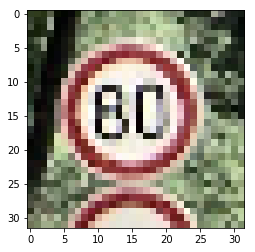

[5]


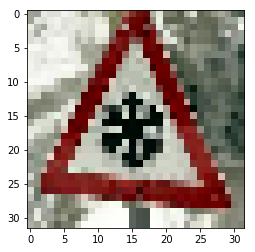

[11]


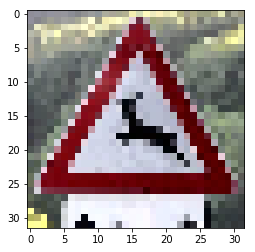

[21]


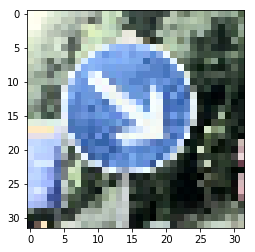

[38]


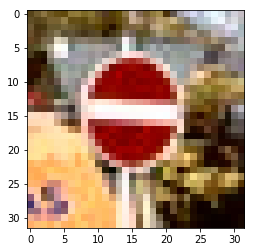

[17]


In [22]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

def load_model_and_predict(features):,
    """Load a model into a session again, and use it to produce predictions of image labels"""
    predictions = []
    with tf.Session() as sess:
        restorer = tf.train.Saver()
        restorer.restore(sess, './lenet-2.ckpt')

        for ind, img in enumerate(features): 
            softmaxes = sess.run(network['softmaxes'], feed_dict={network['x']: [features[ind]]})
            prediction = sess.run(tf.argmax(softmaxes, 1))[0]
            predictions.append(prediction)
            plt.imshow(img)
            plt.show()
            print(sess.run(tf.argmax(network['softmaxes'], 1), feed_dict={network['x']: [features[ind]]}))

            print(
                "prediction: class #{}, description: {}".format(
                    prediction, 
                    label_dict[str(prediction)]
                )
            )
    return predictions

load_model_and_predict(features_web)
predictions = load_model_and_predict(features_web)



### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.



### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [23]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

def print_max_softmaxes(sess, network, img, label):
    restorer = tf.train.Saver()
    restorer.restore(sess, './lenet-2.ckpt')
    logits = sess.run(network['logits'], feed_dict={network['x']: np.array([img]), network['y']: np.array([label])})
    print("logits:")
    print(logits)
    softmaxes = sess.run(network['softmaxes'], feed_dict={network['x']: np.array([img]), network['y']: np.array([label])})
    print("softmaxes")
    print(softmaxes)
    max_softmaxes = tf.nn.top_k(softmaxes, k=5)
    print("max_softmaxes:")
    print("Real label: {}".format(label))
    print(sess.run(max_softmaxes))
    
with tf.Session() as sess:
    for ind, img_label in enumerate(zip(features_web, labels_web)):
        img, label = img_label
        print("**** Picture #{} ****".format(ind + 1))
        print_max_softmaxes(sess, network, img, label)
        print("\n\n")

**** Picture #1 ****
logits:
[[  0.72190344   3.18866467   8.37070942   7.26137972   0.19547474
    7.74649     -1.02527773   3.362921     1.04398894  -0.40793577
    0.99142915  -4.86804295  -4.59316635  -4.1968255   -8.04035473
    1.50945151  -2.95182753 -11.69999313 -11.74090004  -4.62888765
   -2.77834773  -4.23785734 -11.9514513   -4.22769451  -5.78724432
   -2.77620125 -10.7858057  -10.75534344  -3.52147484  -6.74620247
   -2.06930304  -4.39510584  -7.28886652  -8.91257191  -5.93469
   -6.38600588  -3.09054542 -12.04756737  -5.33742428 -12.07588482
   -3.64150381  -4.20426273   0.56931293]]
softmaxes
[[  1.11315385e-04   4.10052162e-04   3.32437791e-02   6.85047150e-01
    1.50286171e-04   2.90603526e-02   2.97517090e-05   9.72983614e-03
    3.05234920e-04   2.08375782e-01   2.53194030e-02   5.26950407e-06
    1.00369514e-04   4.84151940e-04   3.87331493e-05   1.59127533e-03
    4.91048675e-04   2.82550928e-07   3.94594757e-09   1.01437117e-05
    1.61524622e-05   4.84424618e-06

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 